Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

Read the female respondent file and display the variables names.

In [1]:
%matplotlib inline

import chap01soln
resp = chap01soln.ReadFemResp()
resp.columns

/home/anne/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Index([u'caseid', u'rscrinf', u'rdormres', u'rostscrn', u'rscreenhisp',
       u'rscreenrace', u'age_a', u'age_r', u'cmbirth', u'agescrn',
       ...
       u'pubassis_i', u'basewgt', u'adj_mod_basewgt', u'finalwgt', u'secu_r',
       u'sest', u'cmintvw', u'cmlstyr', u'screentime', u'intvlngth'],
      dtype='object', length=3087)

Make a histogram of <tt>totincr</tt> the total income for the respondent's family.  To interpret the codes see the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=MALE&section=R&subSec=7958&srtLabel=609776).

In [2]:
import thinkstats2
hist = thinkstats2.Hist(resp.totincr)
print type(hist)

<class 'thinkstats2.Hist'>


Display the histogram.

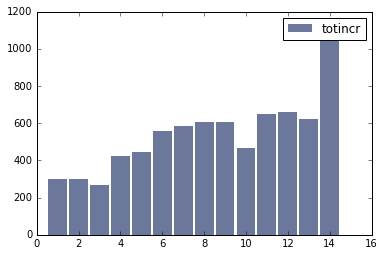

In [3]:
import thinkplot
thinkplot.Hist(hist, label='totincr')
thinkplot.Show()

Make a histogram of <tt>age_r</tt>, the respondent's age at the time of interview.

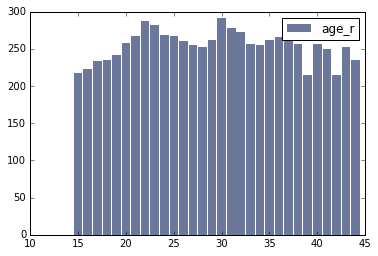

In [4]:
hist = thinkstats2.Hist(resp.age_r)
thinkplot.Hist(hist, label='age_r')
thinkplot.Show()

Make a histogram of <tt>numfmhh</tt>, the number of people in the respondent's household.

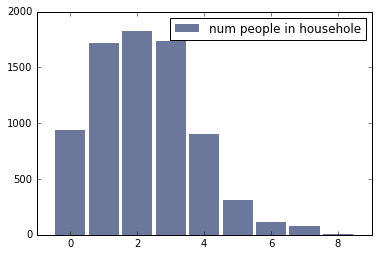

In [5]:
hist = thinkstats2.Hist(resp.numfmhh)
thinkplot.Hist(hist, label='num people in househole')
thinkplot.Show()

Make a histogram of <tt>parity</tt>, the number children the respondent has borne.  How would you describe this distribution?

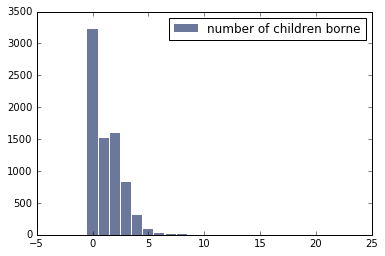

In [6]:
hist = thinkstats2.Hist(resp.parity)
thinkplot.Hist(hist, label='number of children borne')
thinkplot.Show()

I would describe this distribution as very skewed to the left.  There seems to be a significant mode at 0 and the right tail drops off very quickly once we get to 4 or 5.  It's also very clustered - not a very large spread.

Use Hist.Largest to find the largest values of <tt>parity</tt>.

In [7]:
print hist.Largest(5)

[(22, 1), (16, 1), (10, 3), (9, 2), (8, 8)]


This shows the 5 largest parity values.  The two largest are 22 and 16, both of which have a single data point.  This isn't even visible on the histogram, so I would append my previous remarks to say that you could also describe the distribution as having outliers at 22 and 16.

Use <tt>totincr</tt> to select the respondents with the highest income.  Compute the distribution of <tt>parity</tt> for just the high income respondents.

[(14, 1160), (13, 623), (12, 658), (11, 647), (10, 468), (9, 607), (8, 606), (7, 583), (6, 559), (5, 445)]


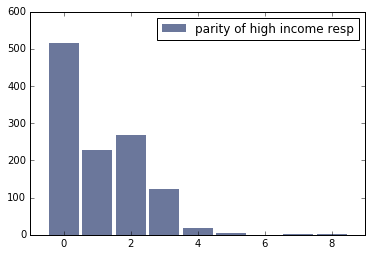

In [8]:
print thinkstats2.Hist(resp.totincr).Largest(10)
# there are 1160 respondants at income level 14, which is $75000+.  I'll assume this is the high income bracket
hist = thinkstats2.Hist(resp.parity[resp.totincr == 14])
thinkplot.Hist(hist, label="parity of high income resp")
thinkplot.Show()

Find the largest parities for high income respondents.

In [9]:
print hist.Largest(5) # prints the 5 largest parities for hist, which here is high-inc resp

[(8, 1), (7, 1), (5, 5), (4, 19), (3, 123)]


Compare the mean <tt>parity</tt> for high income respondents and others.

In [10]:
print "mean parity of high income resp:", resp.parity[resp.totincr == 14].mean()
print "mean parity of all resp:", resp.parity.mean()

mean parity of high income resp: 1.07586206897
mean parity of all resp: 1.22321078111


Investigate any other variables that look interesting.

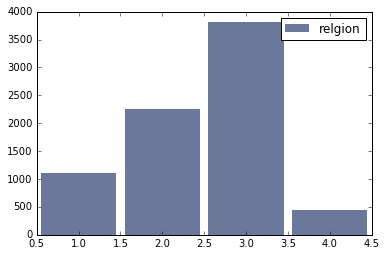

In [11]:
hist = thinkstats2.Hist(resp.religion)
thinkplot.Hist(hist, label="relgion")
thinkplot.Show()
# 1 = no religion
# 2 = catholic
# 3 = protestant
# 4 = other

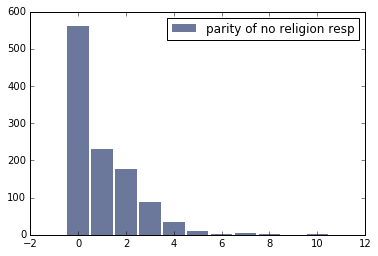

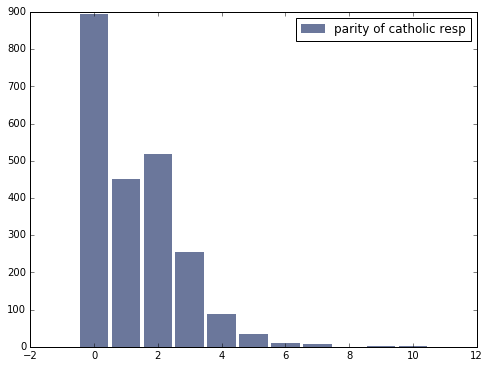

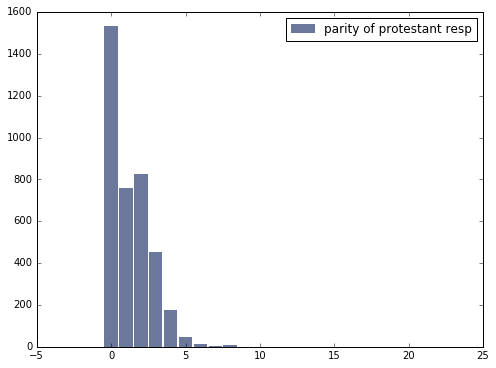

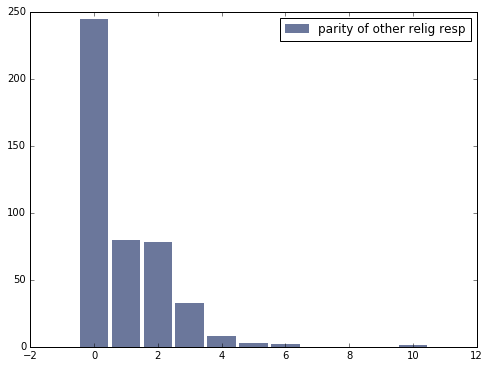

In [12]:
thinkplot.Hist(thinkstats2.Hist(resp.parity[resp.religion == 1]), label="parity of no religion resp")
thinkplot.Show()
thinkplot.Hist(thinkstats2.Hist(resp.parity[resp.religion == 2]), label="parity of catholic resp")
thinkplot.Show()
thinkplot.Hist(thinkstats2.Hist(resp.parity[resp.religion == 3]), label="parity of protestant resp")
thinkplot.Show()
thinkplot.Hist(thinkstats2.Hist(resp.parity[resp.religion == 4]), label="parity of other relig resp")
thinkplot.Show()

In [13]:
print "mean parity of no religion resp:", resp.parity[resp.religion == 1].mean()
print "mean parity of catholic resp:", resp.parity[resp.religion == 2].mean()
print "mean parity of protestant resp:", resp.parity[resp.religion == 3].mean()
print "mean parity of other religion resp:", resp.parity[resp.religion == 4].mean()

mean parity of no religion resp: 0.993693693694
mean parity of catholic resp: 1.28836797877
mean parity of protestant resp: 1.2896389325
mean parity of other religion resp: 0.897777777778


### Exercise 4

Using the variable totalwgt_lb, investigate whether first babies are lighter or heavier than others. Compute Cohen’s d to quantify the difference between the groups. How does it compare to the difference in pregnancy length? 

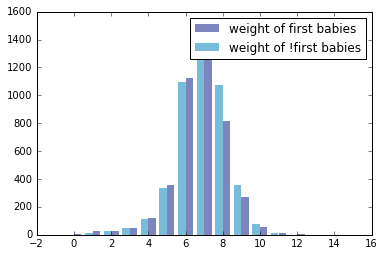

mean weight of first babies: 7.20109443044
mean weight of !first babies: 7.32585561497
difference is  -0.124761184535


In [19]:
# for some reason, although I thought it was the same dataset, resp.birthord and resp.totalwgt_lb are giving errors
# it says they are columns that don't exist, so I used this import instead
import nsfg
df = nsfg.ReadFemPreg()
thinkplot.PrePlot(2)
thinkplot.Hist(thinkstats2.Hist(df.birthwgt_lb[df.birthord == 1]), align="left", width=.4, label="weight of first babies")
thinkplot.Hist(thinkstats2.Hist(df.birthwgt_lb[df.birthord != 1]), align="right", width=.4, label="weight of !first babies")
thinkplot.Show()
firsts = df.totalwgt_lb[df.birthord==1]
others = df.totalwgt_lb[df.birthord!=1]
print "mean weight of first babies:", firsts.mean() 
print "mean weight of !first babies:", others.mean()
print "difference is ", firsts.mean() - others.mean()

In [15]:
# cohen's d = mean(x1) - mean(x2) / s where s = pooled std
print "d =", thinkstats2.CohenEffectSize(firsts, others)

d = -0.0889364117772


The difference in pregnancy length as Cohen's d is 0.029 standard deviations, or almost neglible.  Here, d = 0.0889 (the negative is irrelevant, depends on which input is first), which is a larger effect than the difference in pregnancy lengths, but still very tiny